#  Pair Programming Ajuste

Es el momento de realizar el ajuste de vuestro modelo, en este caso tendréis que usar el csv que guardastéis ayer después de todo el preprocesamiento. Los objetivos de esta lección son:

-  Realizar el ajuste o ajustes de los modelos

- Sacad la matriz de confusión de vuestro modelo e identificad cuáles son los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y matriz de confusión
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('datos/df_codificado_completo.csv', index_col=0)

In [3]:
df.head()

,Agency Type,Claim,Duration,Net Sales,Commision (in value),Age,product_2 way Comprehensive Plan,product_Basic Plan,product_Cancellation Plan,product_Rental Vehicle Excess Insurance,...,destination_HONG KONG,destination_INDONESIA,destination_JAPAN,destination_MALAYSIA,destination_PHILIPPINES,destination_SINGAPORE,destination_THAILAND,destination_UNITED STATES,destination_VIET NAM,destination_otros
21,1,0,12,46.15,11.54,44,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,1,0,7,17.55,4.39,25,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23,1,1,12,94.00,23.50,34,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26,0,0,29,9.90,5.94,33,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
27,0,0,28,9.90,5.94,33,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Para nuestros datos estandarizados, pero sin balancear:

Comenzamos a realizar el modelo separando los datos:

In [4]:
X1 = df.drop("Claim", axis = 1) #Separamos los datos  
y1 = df["Claim"]

In [5]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [6]:
# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

In [7]:
train_df_sinsmot = pd.DataFrame({'Real': y_train1, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train1)})
test_df_sinsmot  = pd.DataFrame({'Real': y_test1,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test1)})
resultados = pd.concat([train_df_sinsmot,test_df_sinsmot], axis = 0)
resultados.head()

,Real,Predicted,Set
12905,0,0,Train
34745,1,0,Train
16553,0,0,Train
15287,0,0,Train
25064,0,0,Train


### Para los datos codificados y balanceados:

In [8]:
df2 = pd.read_csv('datos/df_codificado_balanceado.csv', index_col=0)

In [9]:
df2.head()

,Agency Type,Duration,Net Sales,Commision (in value),Age,product_2 way Comprehensive Plan,product_Basic Plan,product_Cancellation Plan,product_Rental Vehicle Excess Insurance,product_otros_productos,...,destination_INDONESIA,destination_JAPAN,destination_MALAYSIA,destination_PHILIPPINES,destination_SINGAPORE,destination_THAILAND,destination_UNITED STATES,destination_VIET NAM,destination_otros,Claim
0,1,11,22.0,7.70,29,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,29,22.0,0.00,36,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,5,22.0,0.00,36,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,12,27.0,0.00,35,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,22,59.4,35.64,43,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# separamos los datos en X e y

X2 = df2.drop("Claim", axis = 1)
y2 = df2["Claim"]

In [11]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [12]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg.fit(x_train2,y_train2)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train2)

# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test2)

In [13]:
train_df = pd.DataFrame({'Real': y_train2, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train2)})
test_df  = pd.DataFrame({'Real': y_test2,  'Predicted': y_pred_test,  'Set': ['Test']*len(y_test2)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head()

,Real,Predicted,Set
30265,1,1,Train
30016,1,1,Train
31741,1,1,Train
31063,1,0,Train
6607,0,0,Train


## Ahora hacemos la matriz de confusión:

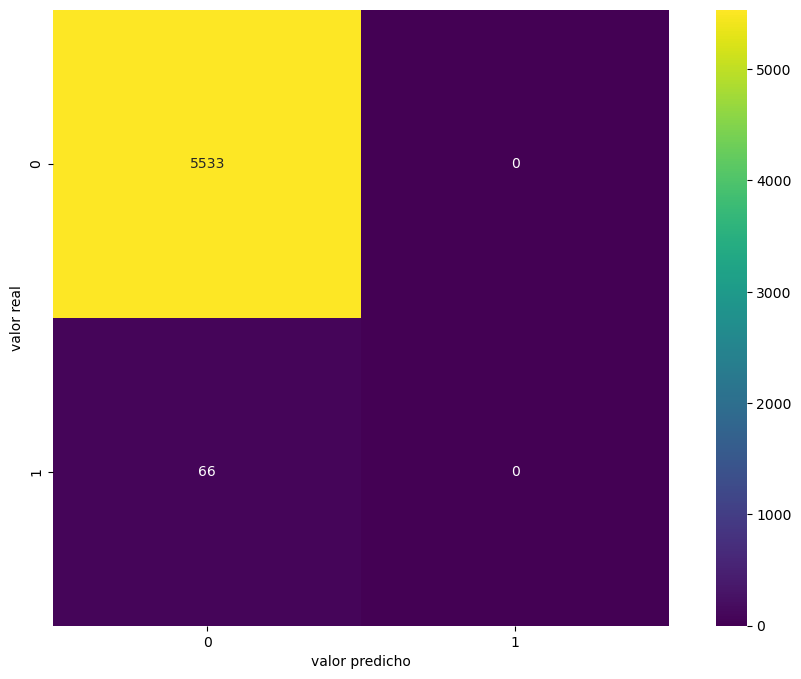

In [15]:
# MATRIZ DE CORRELACIÓN PARA DATOS CODIFICADOS Y  ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Los que reclaman es un 1, los que no un 0:

- Para lo que no reclaman, acierta 5533 veces.
- Para los que reclama no acierta, 0 veces.
- Tenemos 66 falsos no reclamantes, que no iban a reclamar y sí han reclamado.
- 0 falsos que sí  iban a reclamar según nuestras predicciones y  no han reclamado.

Por lo que nuestro modelo funciona genial para los que  no reclaman, pero falla totalmente para los que sí.


## Ahora con el modelo balanceado:

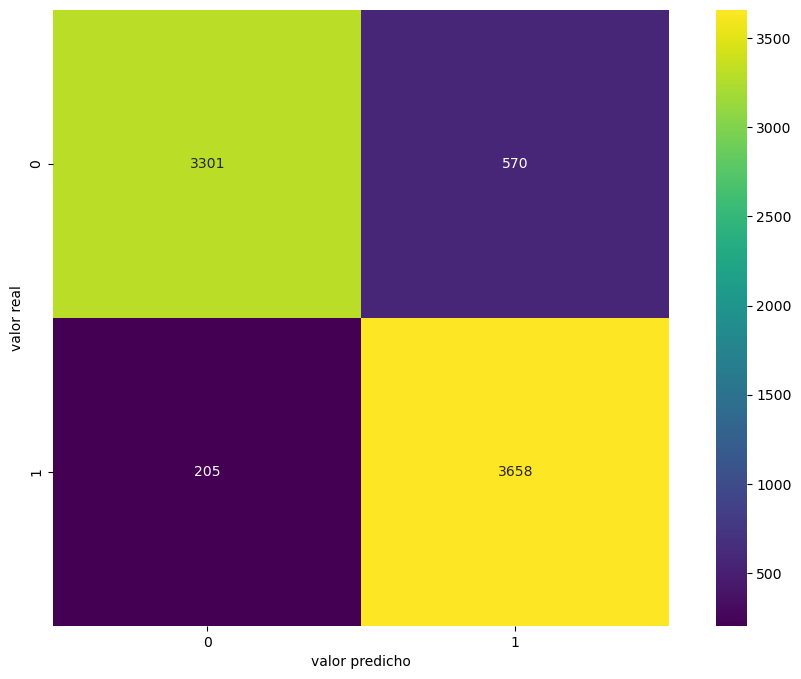

In [14]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

Los que reclaman es un 1, los que no un 0:

- Para lo que no reclaman, acierta 3301 veces (Verdaderos positivos)
- Para los que reclama acierta, 3658 veces (Verdadero negativo)
- Tenemos 205 falsos no reclamantes, que no iban a reclamar y sí han reclamado (Falsos positivos)
- 570 falsos que sí  iban a reclamar según nuestras predicciones y  no han reclamado (Falsos negativos)

